**Проект:** оптимизация отбора бурёнок для молочного хозяйства «Вольный луг» с использованием машинного обучения.

**Описание проекта:** В рамках проекта будут разработаны две модели машинного обучения для помощи фермеру, владельцу молочного хозяйства «Вольный луг», в выборе бурёнок. Фермер стремится обеспечить надой не менее 6000 килограммов молока в год и гарантировать высокое качество молока по своим критериям. Для этого мы создадим модель для прогнозирования удоя и модель для оценки вероятности получения вкусного молока. На основе анализа данных о коровах, предоставленных ассоциацией пастбищ «ЭкоФерма», мы поможем фермеру минимизировать риски при покупке.

**Цель исследования:** Целью исследования является создание и оценка двух прогнозных моделей: одна для предсказания удоя коровы, а другая — для определения вероятности получения вкусного молока. Это позволит фермеру выбрать бурёнок, соответствующий его критериям качества и продуктивности.

**Ход исследования**:
1. Загрузка и изучение данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Корреляционный анализ
5. Задача регрессии
6. Задача классификации
7. Общий вывод

## Загрузка данных

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, precision_score, \
    recall_score, confusion_matrix, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

RANDOM_STATE = 42

In [98]:
!pip install -U scikit-learn

  Using cached scikit_learn-1.6.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.3
    Uninstalling scikit-learn-1.1.3:
      Successfully uninstalled scikit-learn-1.1.3


In [99]:
df_ferma = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')
df_ferma.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [100]:
df_ferma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

In [101]:
df_ferma.shape

(634, 12)

In [102]:
df_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';', decimal=',')
df_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [103]:
df_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [104]:
df_dad.shape

(629, 2)

In [105]:
df_cow = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=',')
df_cow.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [106]:
df_cow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


In [107]:
df_cow.shape

(20, 7)

*Вывод:* были загружены 3 датафрейма и выведена общая информация о них. Данные соответствуют техническому заданию. Однако названия столбцов не соотвествуют "змеиному регистру" и должны быть переименованы. В типах данных ошибок нет.
Размер датафрема df_ferma (634, 12), размер датафрема df_dad (629, 2), размер датафрема df_cow (16, 7)

##  Предобработка данных

In [108]:
df_ferma.columns = ['id', 'удой', 'эке', 'сырой_протеин', 'спо', 'порода', 'тип_пастбища', 'порода_папы_быка','жирность', 'белок','вкус_молока', 'возраст']

In [109]:
df_ferma.columns

Index(['id', 'удой', 'эке', 'сырой_протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы_быка', 'жирность', 'белок', 'вкус_молока', 'возраст'],
      dtype='object')

In [110]:
df_dad.columns = ['id', 'имя_папы']

In [111]:
df_dad.columns

Index(['id', 'имя_папы'], dtype='object')

In [112]:
df_cow.columns = ['порода', 'тип_пастбища', 'порода_папы_быка','имя_папы', 'текущая_жирность', 'текущий_уровень_белок','возраст']

In [113]:
df_cow.columns

Index(['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы',
       'текущая_жирность', 'текущий_уровень_белок', 'возраст'],
      dtype='object')

In [114]:
df_cow['тип_пастбища'] = df_cow['тип_пастбища'].str.capitalize()

In [115]:
df_ferma.duplicated().sum(), df_dad.duplicated().sum(), df_cow.duplicated().sum()

(5, 0, 4)

In [116]:
df_ferma.drop_duplicates(inplace=True)
df_cow.drop_duplicates(inplace=True)

In [117]:
df_ferma.duplicated().sum(), df_dad.duplicated().sum(), df_cow.duplicated().sum()

(0, 0, 0)

In [118]:
df_ferma.isna().sum()

id                  0
удой                0
эке                 0
сырой_протеин       0
спо                 0
порода              0
тип_пастбища        0
порода_папы_быка    0
жирность            0
белок               0
вкус_молока         0
возраст             0
dtype: int64

In [119]:
df_dad.isna().sum()

id          0
имя_папы    0
dtype: int64

In [120]:
df_cow.isna().sum()

порода                   0
тип_пастбища             0
порода_папы_быка         0
имя_папы                 0
текущая_жирность         0
текущий_уровень_белок    0
возраст                  0
dtype: int64

In [121]:
df_ferma['порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [122]:
df_cow['тип_пастбища'].unique()

array(['Холмистое', 'Равнинное'], dtype=object)

In [123]:
df_cow['возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

In [124]:
df_ferma['вкус_молока'].unique()

array(['вкусно', 'не вкусно'], dtype=object)

In [125]:
df_ferma['тип_пастбища'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [126]:
df_ferma['тип_пастбища'] = df_ferma['тип_пастбища'].replace({'Равнинные': 'Равнинное'})
df_ferma['тип_пастбища'].unique()

array(['Равнинное', 'Холмистое'], dtype=object)

In [127]:
df_ferma['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [128]:
df_ferma['порода_папы_быка'] = df_ferma['порода_папы_быка'].replace({'Айдиалл': 'Айдиал'})
df_ferma['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [129]:
set(df_dad['имя_папы'].unique()) == set(df_cow['имя_папы'].unique())

True

In [130]:
set(df_ferma['порода'].unique()) == set(df_cow['порода'].unique())

True

In [131]:
set(df_ferma['возраст'].unique()) == set(df_cow['возраст'].unique())

True

*Вывод:* 
1. была проведена проверка на явные дубликаты во всех датафреймах, они были обнаружены и удалены
2. была проведена проверка на пропуски, они не былы обнаружены
3. была проведена проверка на потенциальные неявные дубликаты, они были обнаружены и изменены

## Исследовательский анализ данных

In [132]:
df_ferma.describe()

,id,удой,эке,сырой_протеин,спо,жирность,белок
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


In [133]:
df_cow.describe()

,текущая_жирность,текущий_уровень_белок
count,16.000000,16.000000
mean,3.571875,3.068250
std,0.141620,0.011264
min,3.340000,3.046000
25%,3.415000,3.059500
50%,3.585000,3.073500
75%,3.692500,3.076750
max,3.770000,3.081000


*Вывод:* обнаружено странное значение для df_ferma['удой']

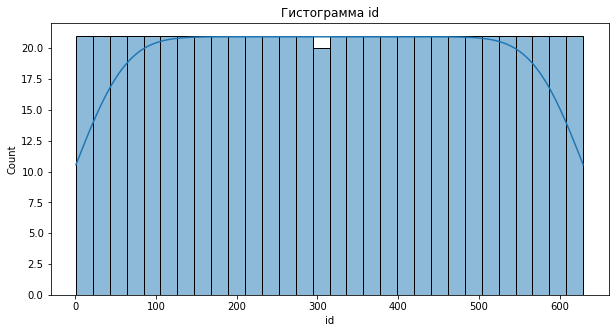

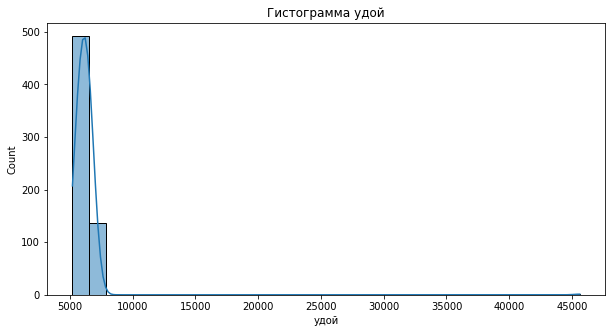

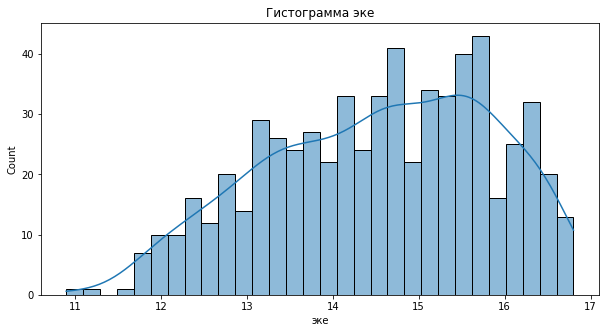

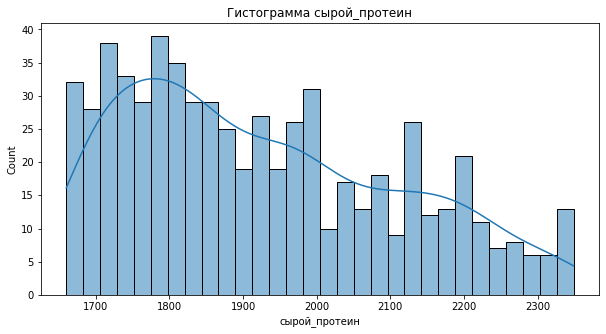

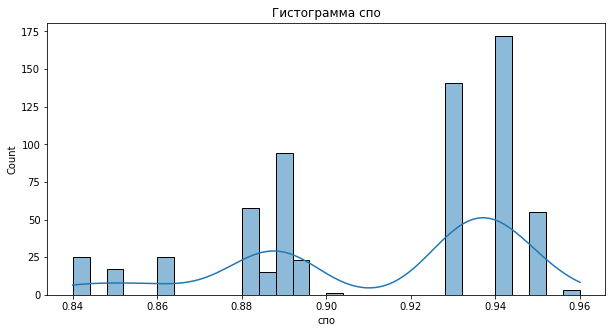

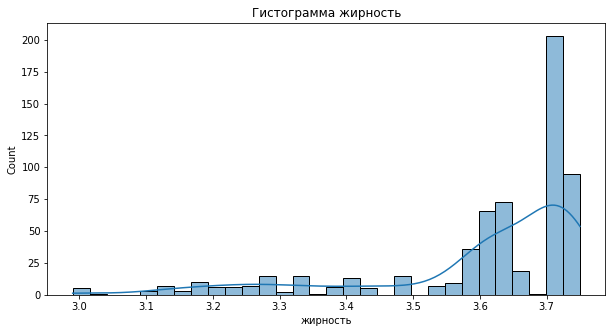

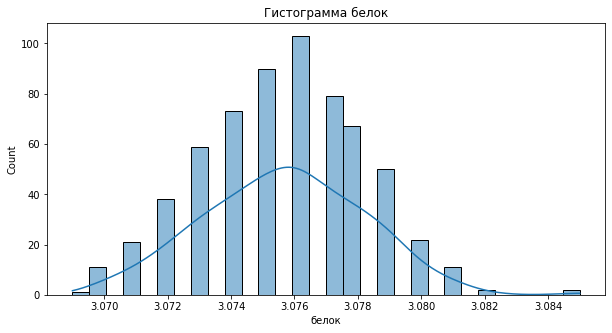

In [134]:
for column in df_ferma.select_dtypes(include=['float64', 'int64'])[1:]:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_ferma[column], bins=30, kde=True)
    plt.title(f'Гистограмма {column}')
    plt.show()

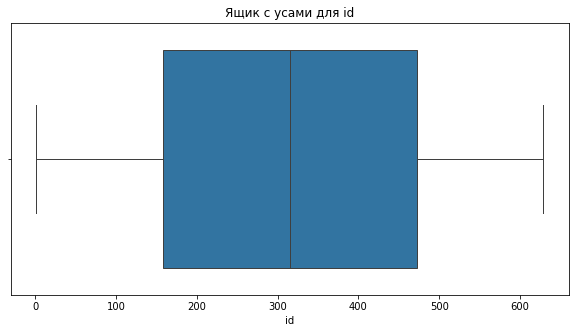

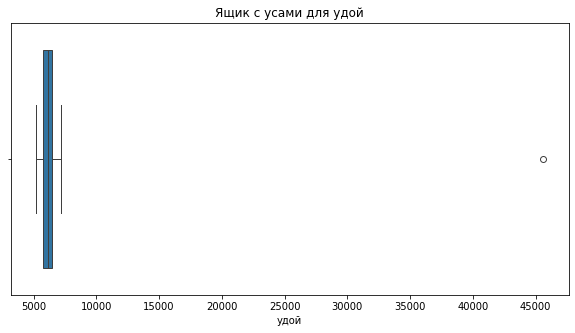

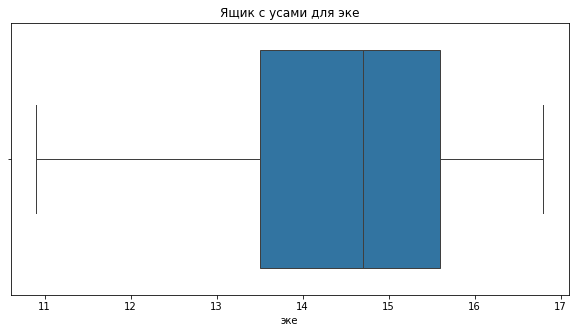

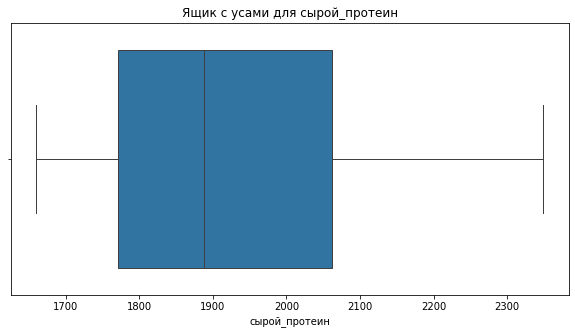

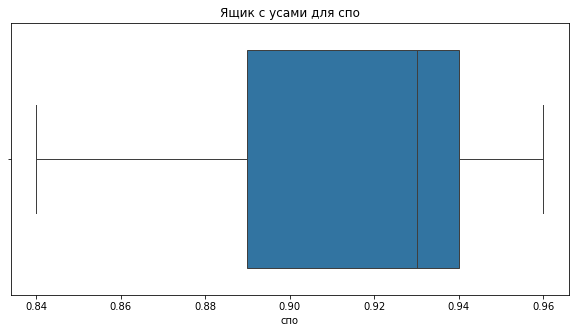

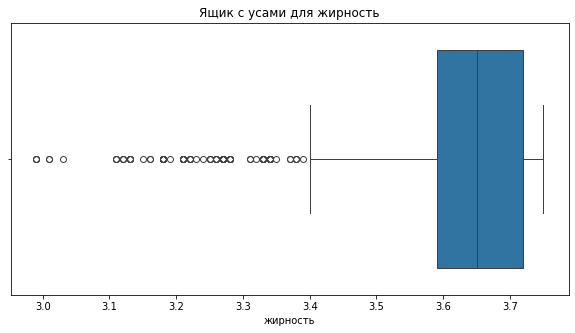

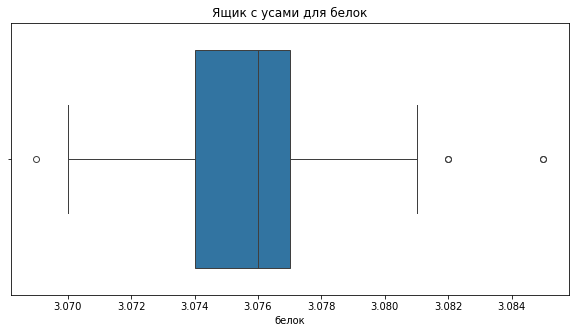

In [135]:
for column in df_ferma.select_dtypes(include=['float64', 'int64']):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_ferma[column])
    plt.title(f'Ящик с усами для {column}')
    plt.show()

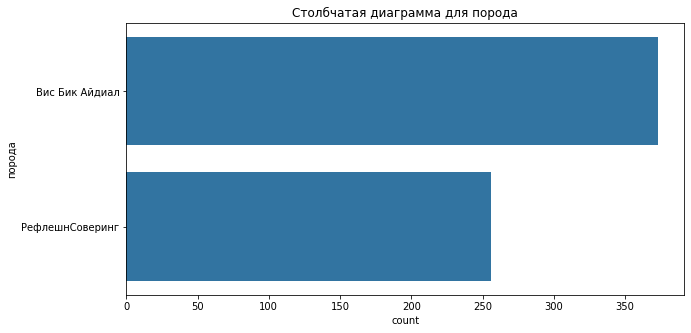

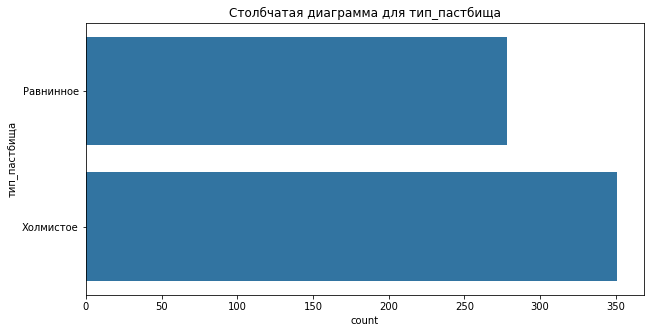

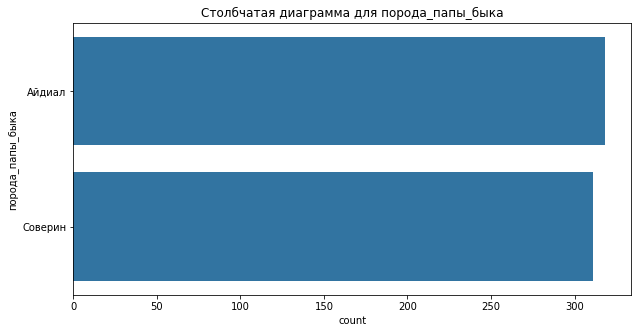

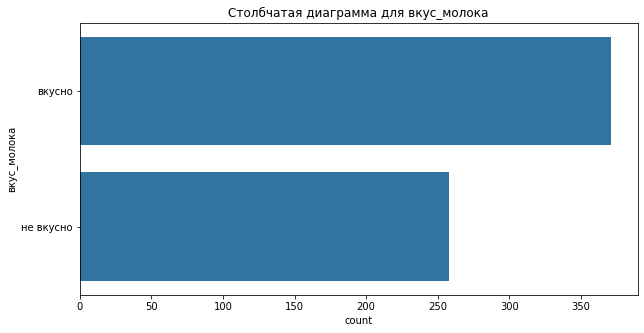

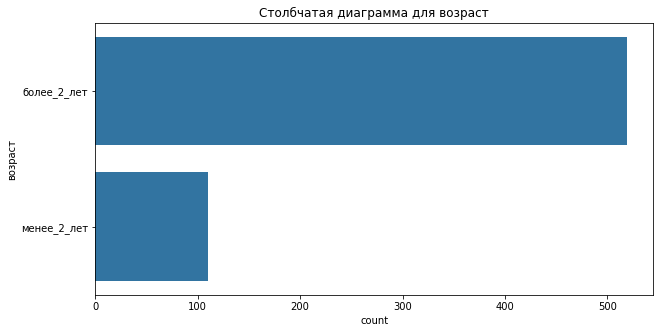

In [136]:
for column in df_ferma.select_dtypes(include=['object', 'category']):
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df_ferma[column])
    plt.title(f'Столбчатая диаграмма для {column}')
    plt.show()

In [137]:
df_ferma[df_ferma['жирность'] < 3.4]

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет
10,11,5591,13.7,1678,0.895,РефлешнСоверинг,Холмистое,Айдиал,3.13,3.075,вкусно,менее_2_лет
16,17,45616,11.5,1675,0.930,Вис Бик Айдиал,Холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет
17,18,5777,12.4,1873,0.895,Вис Бик Айдиал,Холмистое,Айдиал,3.03,3.080,вкусно,более_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
587,588,5610,14.7,1671,0.880,Вис Бик Айдиал,Равнинное,Айдиал,3.18,3.079,не вкусно,более_2_лет
589,590,5213,12.1,2016,0.880,РефлешнСоверинг,Равнинное,Соверин,3.19,3.076,не вкусно,менее_2_лет
591,592,5520,11.9,1785,0.880,Вис Бик Айдиал,Равнинное,Соверин,3.12,3.073,не вкусно,менее_2_лет
602,603,5594,12.3,1742,0.880,Вис Бик Айдиал,Равнинное,Айдиал,3.11,3.077,вкусно,менее_2_лет


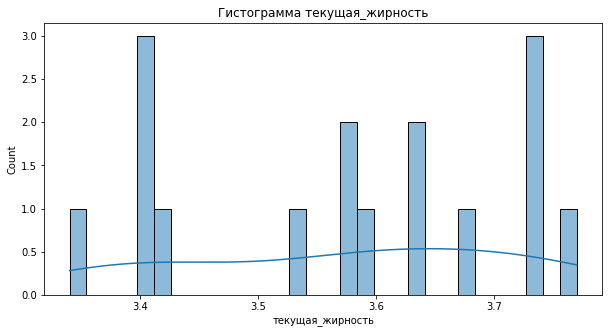

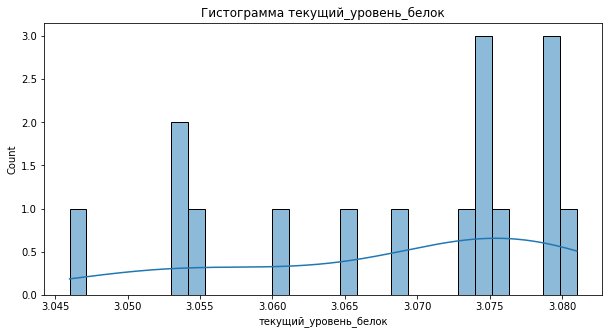

In [138]:
for column in df_cow.select_dtypes(include=['float64', 'int64']):
    plt.figure(figsize=(10, 5))
    sns.histplot(df_cow[column], bins=30, kde=True)
    plt.title(f'Гистограмма {column}')
    plt.show()

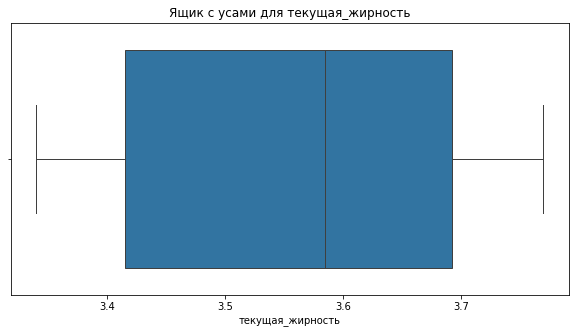

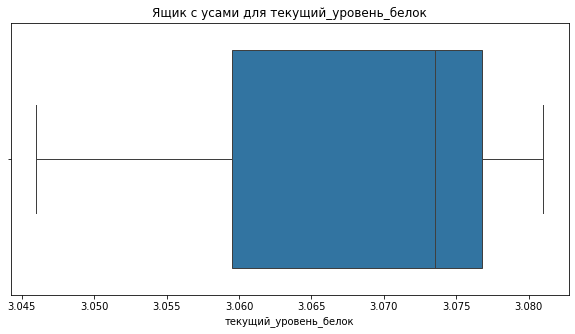

In [139]:
for column in df_cow.select_dtypes(include=['float64', 'int64']):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_cow[column])
    plt.title(f'Ящик с усами для {column}')
    plt.show()

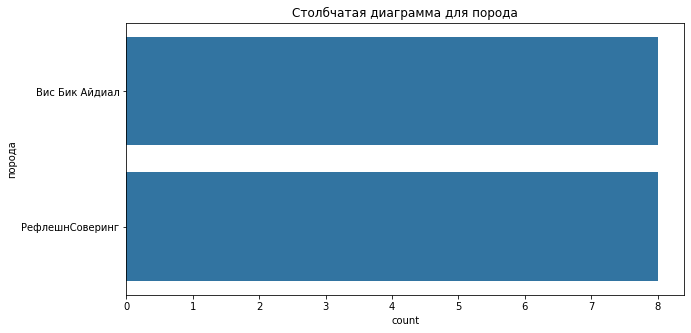

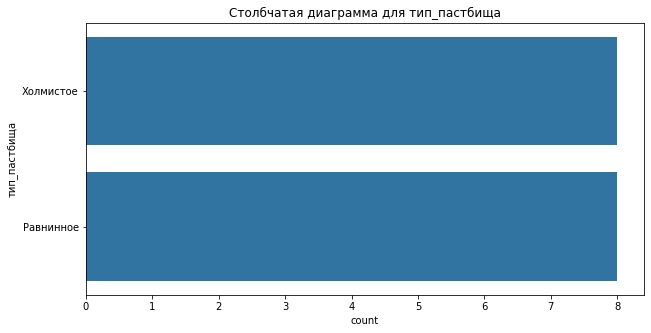

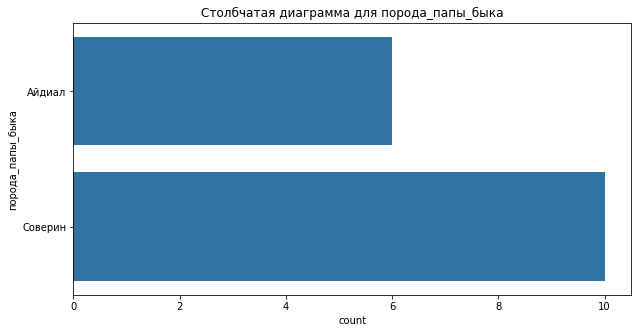

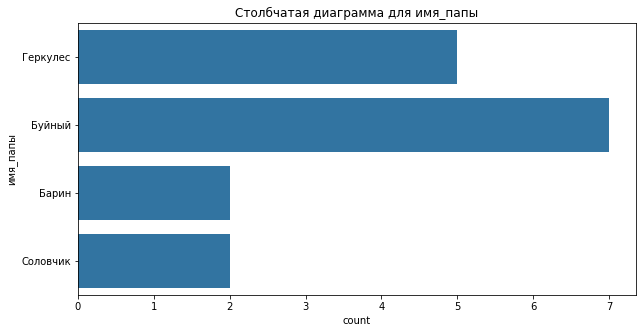

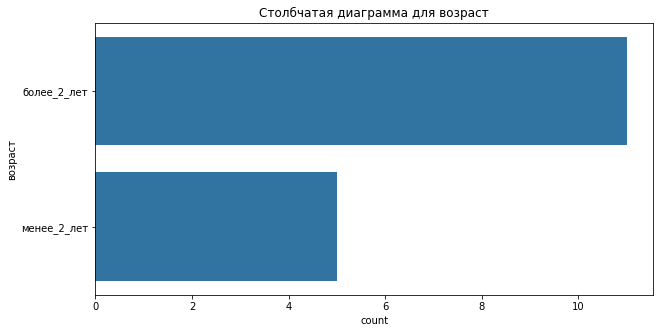

In [140]:
for column in df_cow.select_dtypes(include=['object', 'category']):
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df_cow[column])
    plt.title(f'Столбчатая диаграмма для {column}')
    plt.show()

*Вывод:*

Для df_ferma

1. Видно экстремальное значение в столбце "удой", после проверки физических свойств коровы, можно сделать вывод о то, что это выброс
2. Есть выбросы в столбце "жирность", однако их нельзя удалить, они составляют 14% от общего количества данных
3. Распредление столбца "белок" похоже на нормальное

Для df_cow 

Не обнаружено выбросов

In [141]:
df_ferma = df_ferma.query('удой < 40000')

## Корреляционный анализ

In [142]:
quantitative_features = ['удой', 'эке', 'сырой_протеин', 'спо', 'жирность', 'белок']

spearman_corr = df_ferma[quantitative_features].corr(method='spearman')

print("Коэффициенты корреляции Спирмена:")
display(spearman_corr)

Коэффициенты корреляции Спирмена:


,удой,эке,сырой_протеин,спо,жирность,белок
удой,1.000000,0.765144,0.437543,0.787904,0.688506,-0.005701
эке,0.765144,1.000000,0.384747,0.741962,0.686973,-0.013321
сырой_протеин,0.437543,0.384747,1.000000,0.485890,0.392822,0.229051
спо,0.787904,0.741962,0.485890,1.000000,0.701044,0.109924
жирность,0.688506,0.686973,0.392822,0.701044,1.000000,0.043125
белок,-0.005701,-0.013321,0.229051,0.109924,0.043125,1.000000


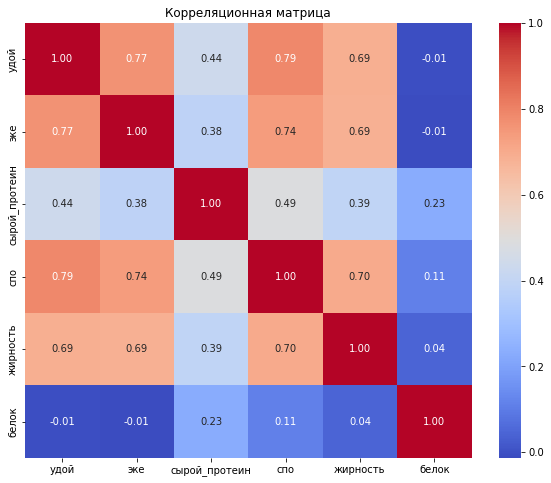

In [143]:
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

*Вывод:* самая сильная корреляционная связь наблюдается между: 
1. СПО и удой
2. ЭКЕ и удой
3. удой и жирность

самая низкая корреляционная связь наблюдается между: 
1. белок и удой

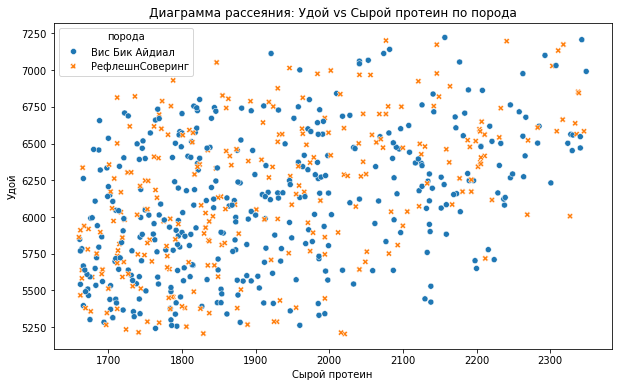

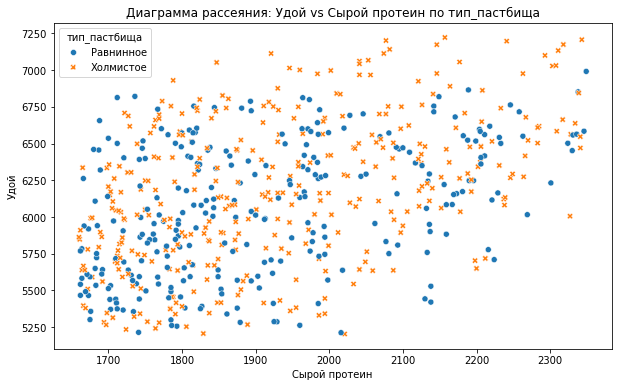

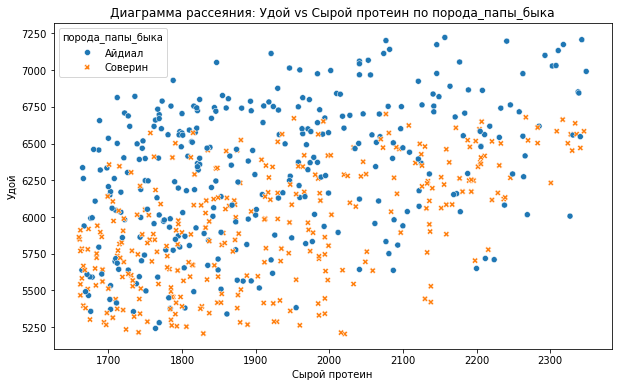

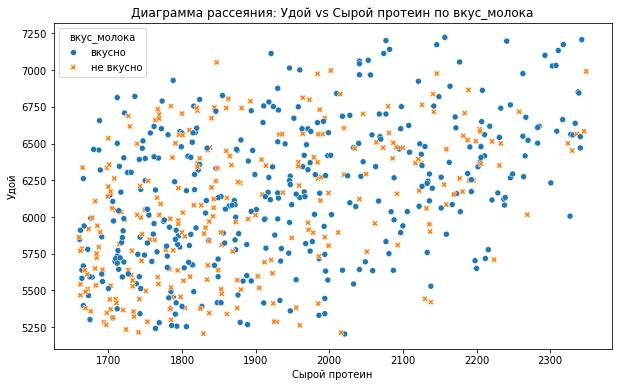

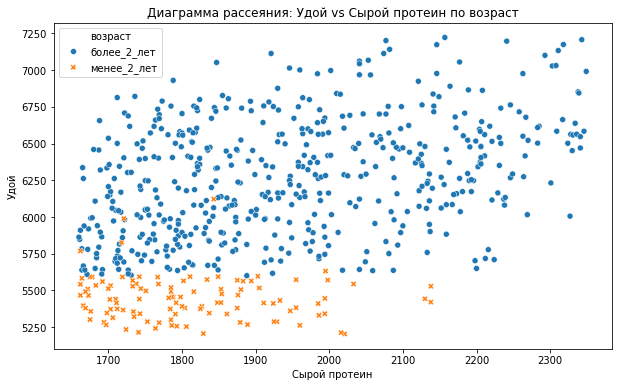

In [144]:
categorical_features = ['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']


for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_ferma, x='сырой_протеин', y='удой', hue=feature, style=feature)
    plt.title(f'Диаграмма рассеяния: Удой vs Сырой протеин по {feature}')
    plt.xlabel('Сырой протеин')
    plt.ylabel('Удой')
    plt.legend(title=feature)  
    plt.show()


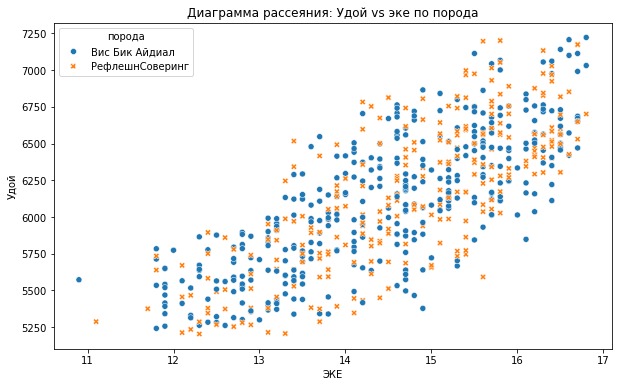

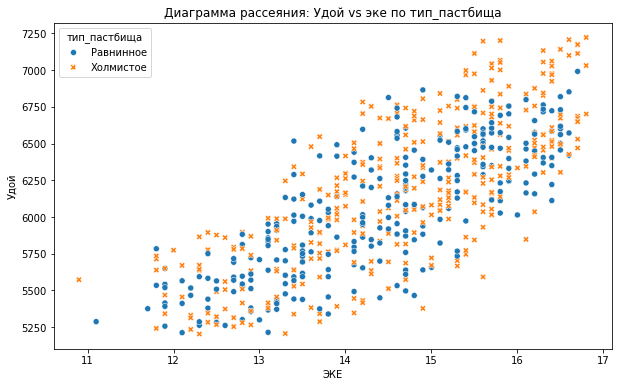

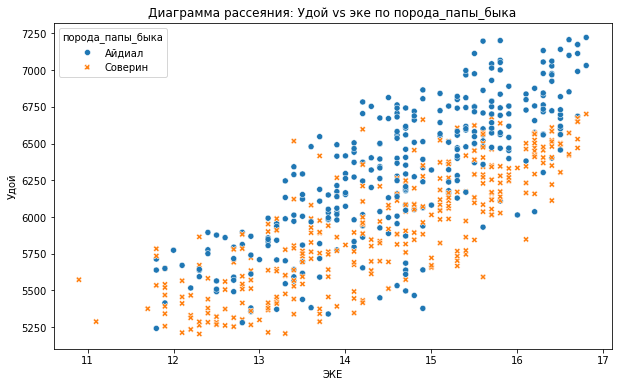

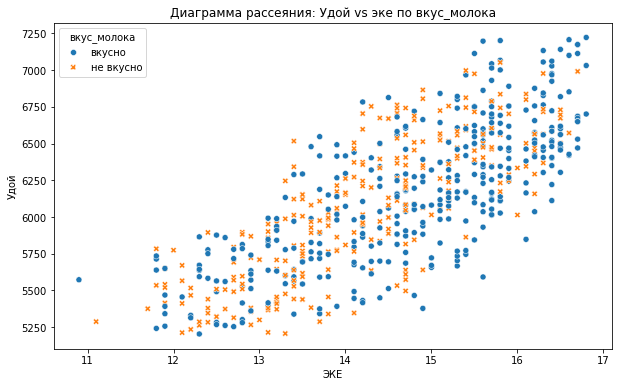

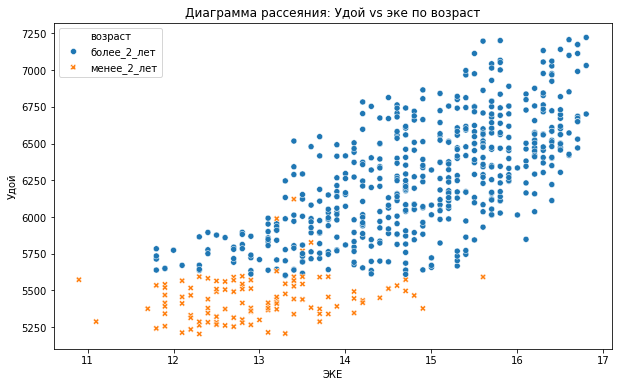

In [145]:



for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_ferma, x='эке', y='удой', hue=feature, style=feature)
    plt.title(f'Диаграмма рассеяния: Удой vs эке по {feature}')
    plt.xlabel('ЭКЕ')
    plt.ylabel('Удой')
    plt.legend(title=feature)  
    plt.show()


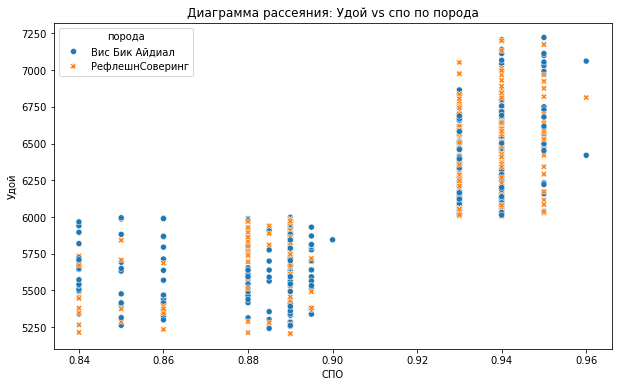

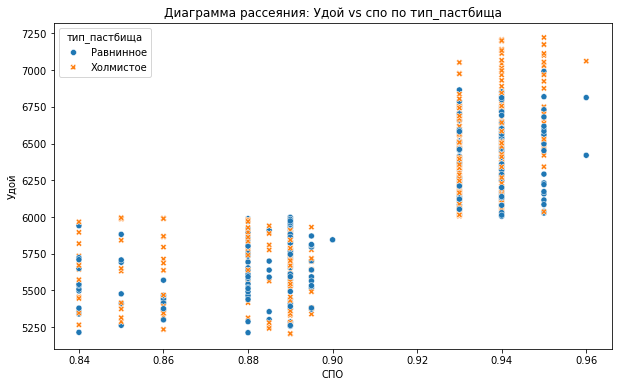

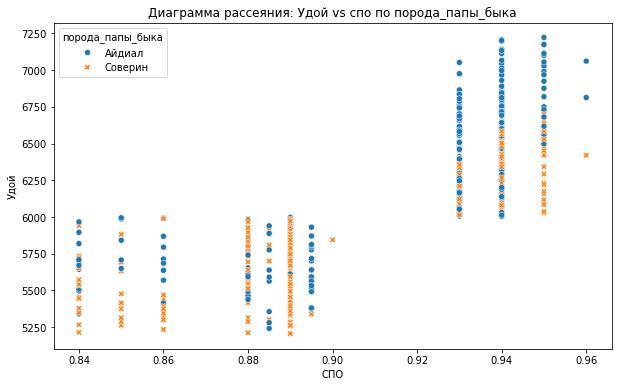

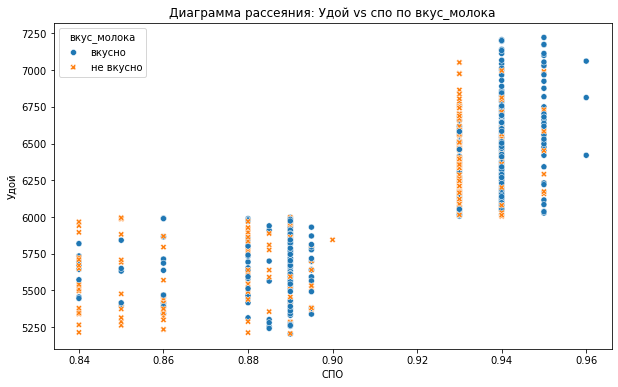

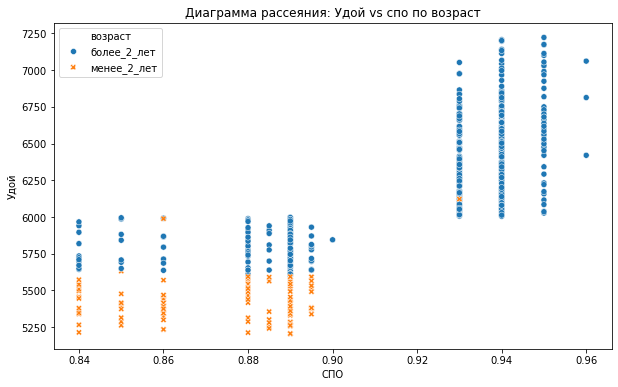

In [146]:



for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_ferma, x='спо', y='удой', hue=feature, style=feature)
    plt.title(f'Диаграмма рассеяния: Удой vs спо по {feature}')
    plt.xlabel('СПО')
    plt.ylabel('Удой')
    plt.legend(title=feature)  
    plt.show()


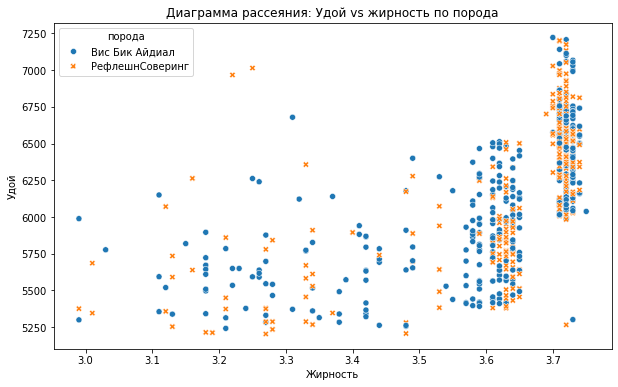

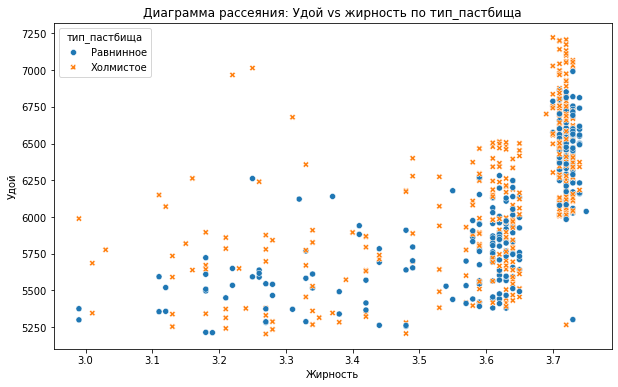

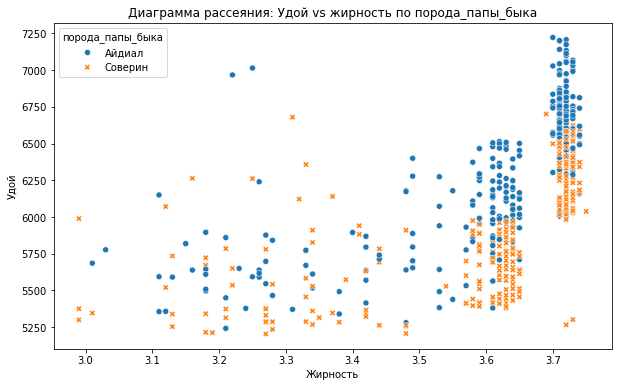

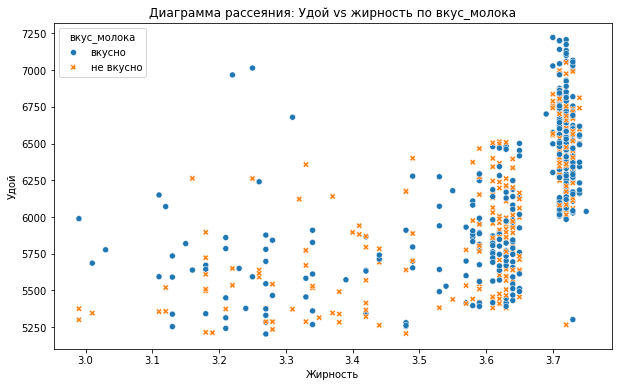

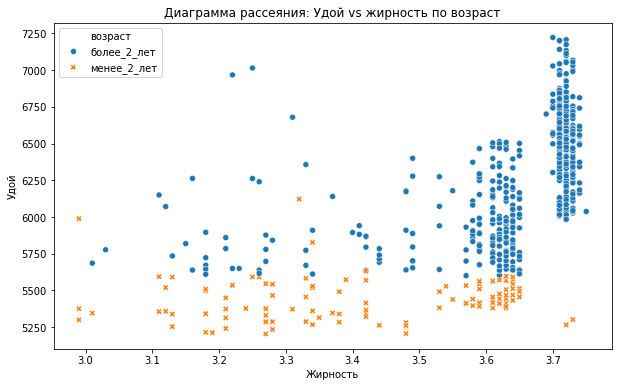

In [147]:



for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_ferma, x='жирность', y='удой', hue=feature, style=feature)
    plt.title(f'Диаграмма рассеяния: Удой vs жирность по {feature}')
    plt.xlabel('Жирность')
    plt.ylabel('Удой')
    plt.legend(title=feature)  
    plt.show()


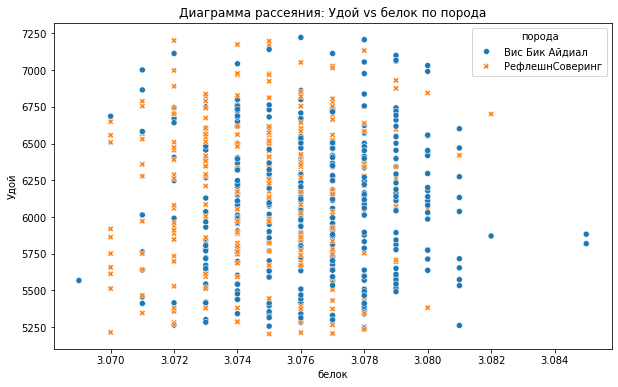

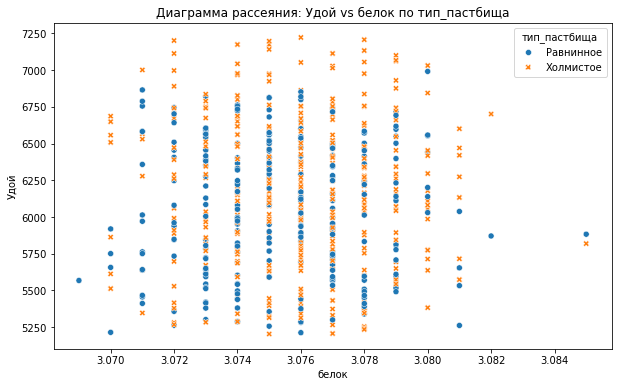

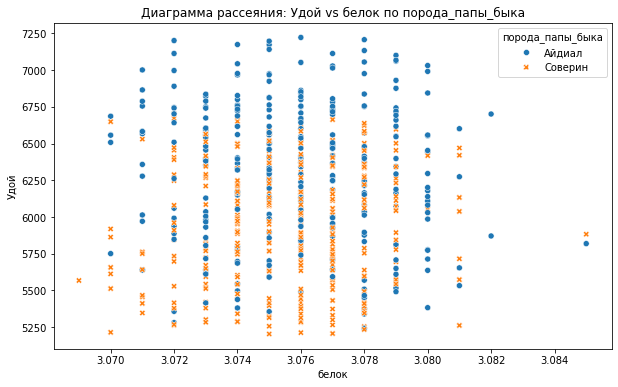

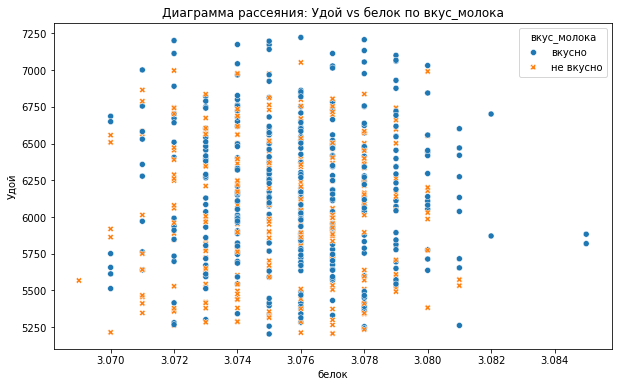

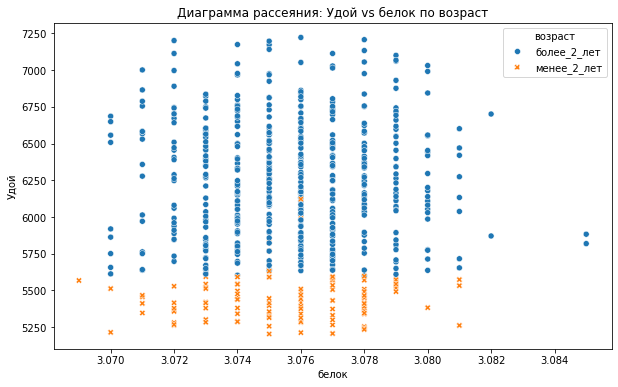

In [148]:
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_ferma, x='белок', y='удой', hue=feature, style=feature)
    plt.title(f'Диаграмма рассеяния: Удой vs белок по {feature}')
    plt.xlabel('белок')
    plt.ylabel('Удой')
    plt.legend(title=feature)  
    plt.show()


*Выводы:* Целевой признак - удой

исходя из построенных диаграмм и коэф-ов корреляции:

1. между целевым и входными признаками связь в основном линейная
2. удой и эке: сильная положительная линейная связь 
3. удой и сырой_протеин: несильная положительная связь
4. удой и спо: возможна нелинейная связь, высокий коэф-т корреляции
5. удой и жирность: умеренная положительная связь
6. удой и белок: остсутствует связь
7. возраст имеет очень сильную взаимосвязь с целевым признаком

Однако, я не наблюдаю наличие мальтиколлинеарности


## Обучение модели линейной регрессии

**№1**

In [149]:
X = df_ferma.drop(['id', 'белок', 'жирность', 'удой'], axis=1)
y = df_ferma['удой']

*Обоснование выбора:* Не использованы были признаки: белок - отсуствует связь с целевым признаком. Жирность относится к той же группе характеристик, что и белок, поэтому его тоже убираем.
Признак id - не нужен для обучения модели.

**Общая функция для моделей линейной регрессии**

R^2: 0.7951757980652822, MSE: 41695.0313959099, RMSE: 204.19361252475528, MAE: 160.87314968758835
95% доверительный интервал = (6108.330375391947, 6231.163077017304)


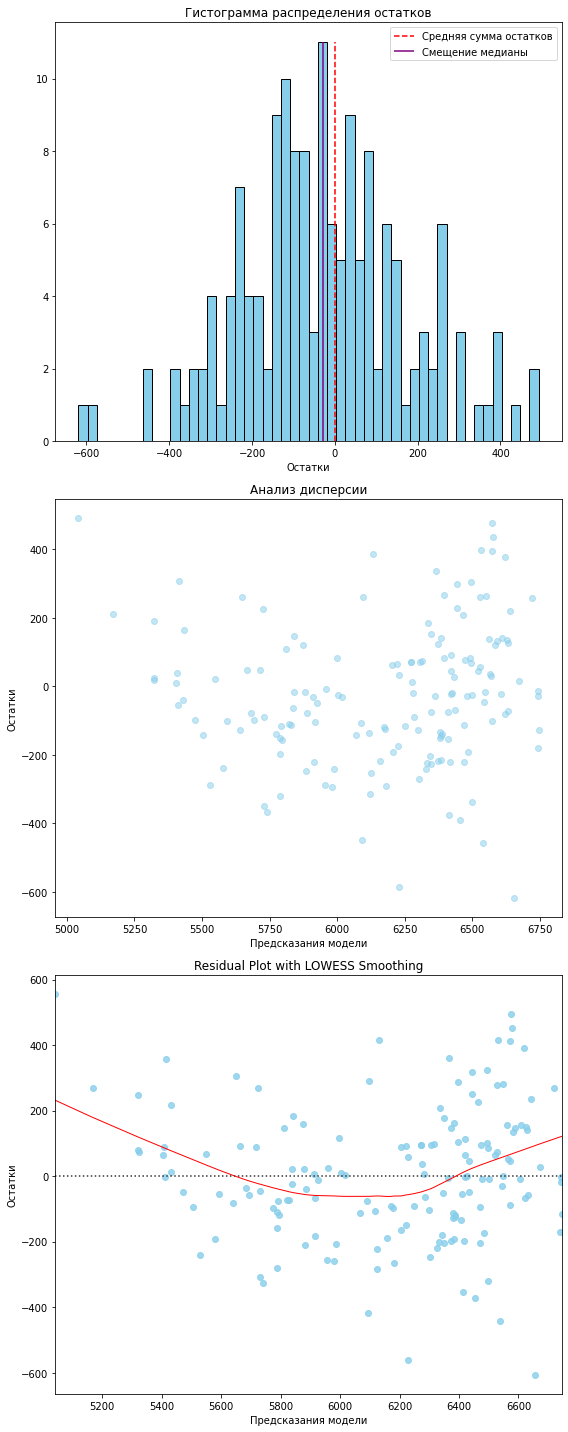

In [150]:
def plot_residuals(y_test, predictions):
    residuals_1 = y_test - predictions

    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 20))

    axes[0].hist(residuals_1, bins=50, color='skyblue', edgecolor='black')
    axes[0].vlines(x=0, colors='red', ymin=0, ymax=11, linestyles='--', label='Средняя сумма остатков')
    axes[0].vlines(x=np.median(residuals_1), colors='purple', ymin=0, ymax=11, label='Смещение медианы')
    axes[0].legend()
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')

    axes[1].scatter(predictions, residuals_1, color='skyblue', alpha=0.5)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')

    sns.residplot(x=predictions, y=residuals_1, lowess=True, ax=axes[2], 
                  color='skyblue', line_kws={'color': 'red', 'lw': 1})
    axes[2].set_title('Residual Plot with LOWESS Smoothing')
    axes[2].set_xlabel('Предсказания модели')
    axes[2].set_ylabel('Остатки')

    plt.tight_layout()
    plt.show()



def train_model(X, y, categorial_col_names, numeric_col_names):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    X_train_full = pd.concat([X_train, X_test], ignore_index=True)
    y_train_full = pd.concat([y_train, y_test], ignore_index=True)
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    X_train_ohe = encoder.fit_transform(X_train[categorial_col_names])
    X_test_ohe = encoder.transform(X_test[categorial_col_names])

    encoder_col_names = encoder.get_feature_names_out(categorial_col_names)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[numeric_col_names])
    X_test_scaled = scaler.transform(X_test[numeric_col_names])

    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_col_names)

    X_train_final = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test_final = pd.concat([X_test_ohe, X_test_scaled], axis=1)

    model = LinearRegression() 
    model.fit(X_train_final, y_train)
    
    predictions = model.predict(X_test_final)

    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test, predictions)

    print(f'R^2: {r2}, MSE: {mse}, RMSE: {rmse}, MAE: {mae}')
    
    confidence_interval = st.norm.interval(confidence=0.95, loc=np.mean(predictions), scale=st.sem(predictions))
    
    print('95% доверительный интервал =', confidence_interval)
    
    plot_residuals(y_test, predictions)
    

    return model, scaler, encoder, X_train_full, y_train_full

categorial_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']
numeric_col_names = ['эке', 'спо', 'сырой_протеин']
model, scaler, encoder, X_train_full, y_train_full = train_model(X, y, categorial_col_names, numeric_col_names)

*Выводы:*
1. R^2 = 0.795
2. MSE = 41695.031
3. RMSE = 204.194
4. MAE = 160.873
5. Остатки распределены нормально и симметричны относительно самого частого значения, есть смещение
6. Остатки не имеют постоянную дисперсию на всём интервале
7. Закономерностей не наблюдается

**№2**

In [151]:
ferma_2 = df_ferma.copy(deep=True)

Значение СПО, являющееся границей между кластерами ~ 0.91

In [152]:
ferma_2['спо_кат'] = ferma_2['спо'].apply(lambda x: 1 if x > 0.91 else 0)

In [153]:
ferma_2['эке_в_квадрате'] = ferma_2['эке'] ** 2

In [154]:
ferma_2.head(10)

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,спо_кат,эке_в_квадрате
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет,0,161.29
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.48,3.077,вкусно,более_2_лет,0,174.24
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинное,Айдиал,3.55,3.076,вкусно,более_2_лет,1,216.09
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет,1,201.64
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет,0,179.56


In [155]:
ferma_2 = ferma_2.drop(['id', 'белок', 'жирность', 'эке', 'спо'], axis=1)
ferma_2.head()

,удой,сырой_протеин,порода,тип_пастбища,порода_папы_быка,вкус_молока,возраст,спо_кат,эке_в_квадрате
0,5863,1743,Вис Бик Айдиал,Равнинное,Айдиал,вкусно,более_2_лет,0,201.64
1,5529,2138,Вис Бик Айдиал,Равнинное,Соверин,вкусно,менее_2_лет,0,163.84
2,5810,1854,РефлешнСоверинг,Холмистое,Соверин,не вкусно,более_2_лет,0,196.00
3,5895,2012,РефлешнСоверинг,Холмистое,Айдиал,не вкусно,более_2_лет,0,153.76
4,5302,1675,Вис Бик Айдиал,Равнинное,Соверин,вкусно,менее_2_лет,0,163.84


R^2: 0.820097367718629, MSE: 36621.87295410215, RMSE: 191.36842204005904, MAE: 147.77939186178457
95% доверительный интервал = (6104.19922618245, 6230.316008705314)


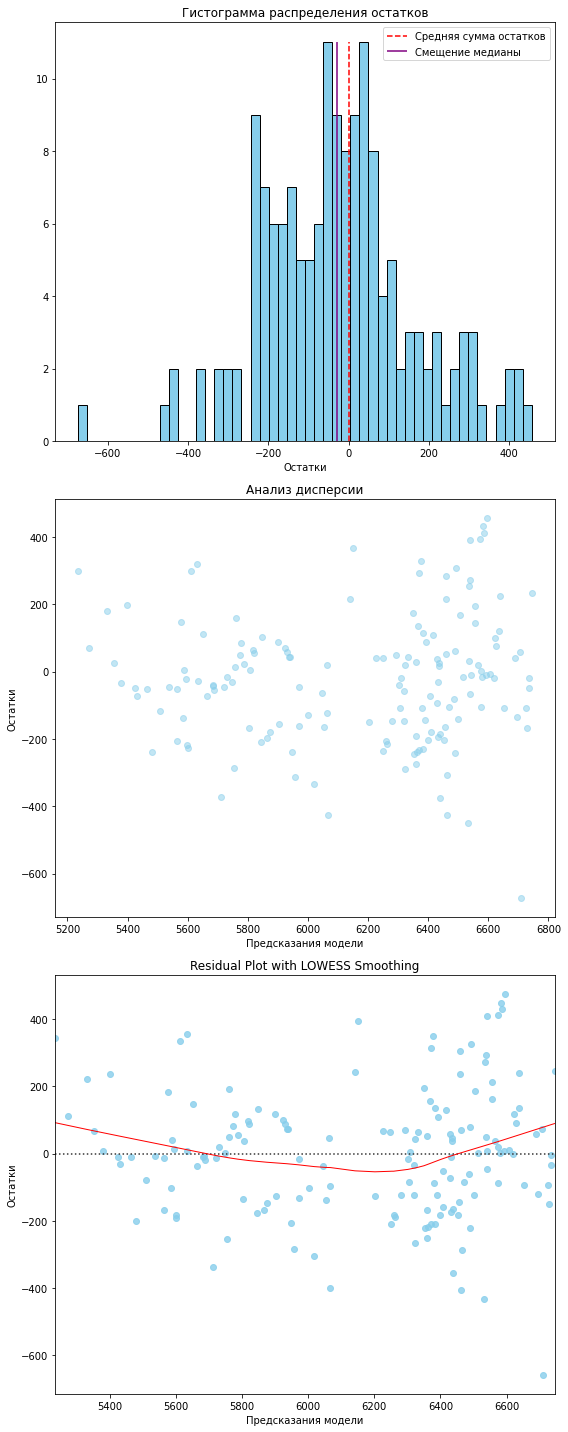

In [156]:
X = ferma_2.drop('удой', axis=1)
y = ferma_2['удой']

categorial_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']
numeric_col_names = ['эке_в_квадрате', 'спо_кат', 'сырой_протеин']

model, scaler, encoder, X_train_full, y_train_full = train_model(X, y, categorial_col_names, numeric_col_names)

*Выводы:*
1. R^2 = 0.8201 (увеличилось)
2. MSE = 36621.87
3. RMSE = 191.368
4. MAE = 147.779
5. Остатки распределены нормально и симметричны относительно самого частого значения, есть небольшое смещение
6. Остатки не имеют постоянную дисперсию на всём интервале
7. Закономерностей не наблюдается

**№3**

In [157]:
ferma_full = df_ferma.merge(df_dad, on='id')
ferma_full.head()

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,имя_папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин


In [158]:
ferma_full['спо_кат'] = ferma_full['спо'].apply(lambda x: 1 if x > 0.91 else 0)

ferma_full['эке_в_квадрате'] = ferma_full['эке'] ** 2

In [159]:
ferma_full = ferma_full.drop(['id', 'белок', 'жирность', 'эке', 'спо'], axis=1)
ferma_full.head()

,удой,сырой_протеин,порода,тип_пастбища,порода_папы_быка,вкус_молока,возраст,имя_папы,спо_кат,эке_в_квадрате
0,5863,1743,Вис Бик Айдиал,Равнинное,Айдиал,вкусно,более_2_лет,Буйный,0,201.64
1,5529,2138,Вис Бик Айдиал,Равнинное,Соверин,вкусно,менее_2_лет,Соловчик,0,163.84
2,5810,1854,РефлешнСоверинг,Холмистое,Соверин,не вкусно,более_2_лет,Барин,0,196.00
3,5895,2012,РефлешнСоверинг,Холмистое,Айдиал,не вкусно,более_2_лет,Буйный,0,153.76
4,5302,1675,Вис Бик Айдиал,Равнинное,Соверин,вкусно,менее_2_лет,Барин,0,163.84


In [160]:
X = ferma_full.drop('удой', axis=1)
y = ferma_full['удой']


R^2: 0.8262863382397995, MSE: 35362.015389658605, RMSE: 188.04790716638834, MAE: 144.71452607169232
95% доверительный интервал = (6093.573683581589, 6222.856638026672)


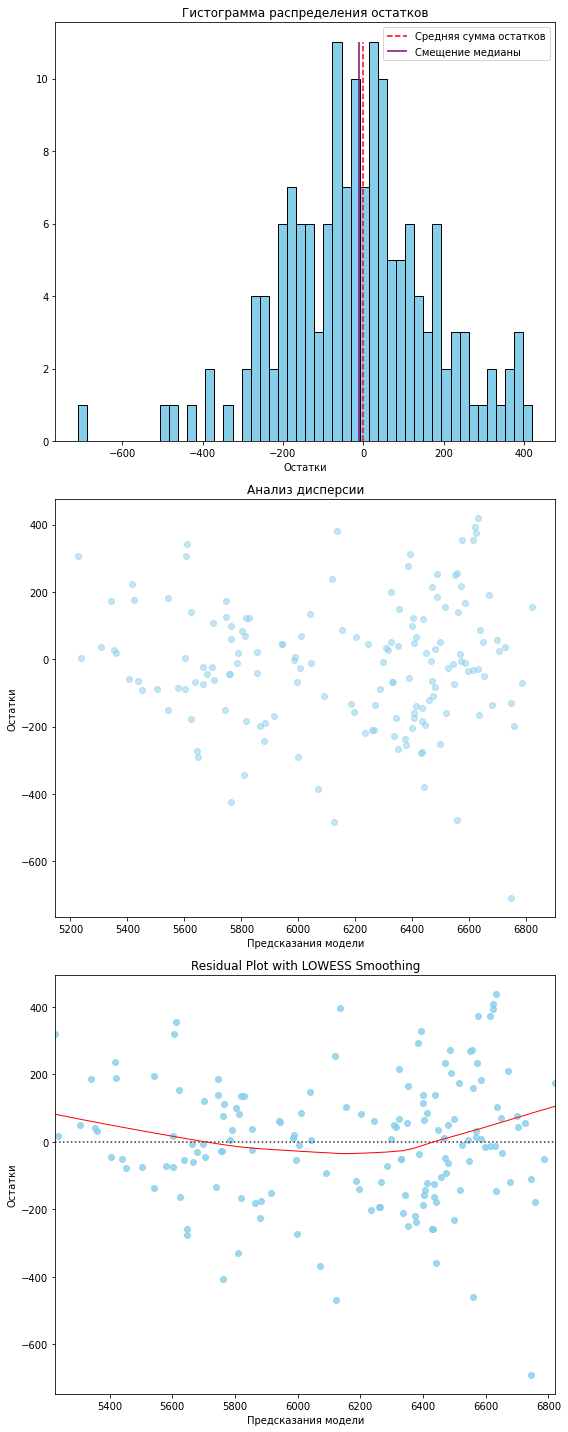

In [161]:
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы', 'вкус_молока']
num_col_names = ['эке_в_квадрате', 'спо_кат', 'сырой_протеин']

model, scaler, encoder, X_train_full, y_train_full = train_model(X, y, cat_col_names, num_col_names)

*Выводы:*
1. R^2 = 0.8263 (увеличилось)
2. MSE = 35362.015
3. RMSE = 188.0479
4. MAE = 144.714
5. Остатки распределены нормально и симметричны относительно самого частого значения, самое маленькое смещение
6. Остатки не имеют постоянную дисперсию на всём интервале
7. Закономерностей не наблюдается

**№4-5**

In [162]:
r2 = [0.795, 0.8201, 0.8263]
print(f'R^2: первая модель - {r2[0]}, вторая модель - {r2[1]}, третья модель - {r2[2]}. Максимальный: {max(r2)}')

R^2: первая модель - 0.795, вторая модель - 0.8201, третья модель - 0.8263. Максимальный: 0.8263


*Вывод:*

Самый большой коэф-т детерминации у второй модели


In [163]:
mse_compared = {'первой': 41695.031 , 'второй': 36621.87, 'третьей': 35362.015}
for k, v in mse_compared.items():
    print(f'MSE {k} модели: {v}')

print()
    
rmse_compared = {'первой': 204.194, 'второй': 191.368, 'третьей': 188.0479}
for k, v in rmse_compared.items():
    print(f'RMSE {k} модели: {v}')

print()

mae_compared = {'первой': 160.873, 'второй': 147.779, 'третьей': 144.714}
for k, v in mae_compared.items():
    print(f'MAE {k} модели: {v}')

MSE первой модели: 41695.031
MSE второй модели: 36621.87
MSE третьей модели: 35362.015

RMSE первой модели: 204.194
RMSE второй модели: 191.368
RMSE третьей модели: 188.0479

MAE первой модели: 160.873
MAE второй модели: 147.779
MAE третьей модели: 144.714


*Вывод:*

Самые маленькие значения метрик у 3-й модели

95% доверительный интервал = (6093.573683581589, 6222.856638026672)

*Вывод:*

Лучшая модель - **третья**

Модель в среднем ошибается на 188.0479 кг в предсказаниях.

**№6**

In [164]:
cow = df_cow.copy(deep=True)

In [165]:
mean_values = df_ferma[['эке', 'сырой_протеин', 'спо']].mean()
new_values = mean_values * 1.05

In [166]:
cow['эке'] = new_values['эке']
cow['эке_в_квадрате'] = cow['эке'] ** 2
cow['сырой_протеин'] = new_values['сырой_протеин']
cow['спо'] = new_values['спо']
cow['спо_кат'] = cow['спо'].apply(lambda x: 1 if x > 0.91 else 0)

In [167]:

cow.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст,эке,эке_в_квадрате,сырой_протеин,спо,спо_кат
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0.958744,1
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,233.361138,2019.947532,0.958744,1
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.958744,1
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,233.361138,2019.947532,0.958744,1
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.958744,1


In [168]:
cow = cow.drop(['текущий_уровень_белок', 'эке', 'спо', 'текущая_жирность'], axis=1)
cow.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,возраст,эке_в_квадрате,сырой_протеин,спо_кат
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,более_2_лет,233.361138,2019.947532,1
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,менее_2_лет,233.361138,2019.947532,1
2,РефлешнСоверинг,Равнинное,Соверин,Барин,более_2_лет,233.361138,2019.947532,1
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,более_2_лет,233.361138,2019.947532,1
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,более_2_лет,233.361138,2019.947532,1


In [169]:
X_train_full = X_train_full.drop('вкус_молока', axis=1)
X_train_full.head()

,сырой_протеин,порода,тип_пастбища,порода_папы_быка,возраст,имя_папы,спо_кат,эке_в_квадрате
0,2123,РефлешнСоверинг,Холмистое,Соверин,более_2_лет,Соловчик,1,272.25
1,1889,РефлешнСоверинг,Холмистое,Соверин,менее_2_лет,Барин,0,156.25
2,1671,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,Буйный,0,216.09
3,2063,Вис Бик Айдиал,Холмистое,Айдиал,более_2_лет,Буйный,1,207.36
4,2077,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,Геркулес,0,171.61


In [170]:
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_кат']
num_col_names = ['эке_в_квадрате', 'сырой_протеин']

encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train_full[cat_col_names])
X_test_ohe = encoder.transform(cow[cat_col_names])

encoder_col_names = encoder.get_feature_names_out(cat_col_names)

print(encoder_col_names)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full[num_col_names])
X_test_scaled = scaler.transform(cow[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train_full = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_full = pd.concat([X_test_ohe, X_test_scaled], axis=1)

['порода_РефлешнСоверинг' 'тип_пастбища_Холмистое'
 'порода_папы_быка_Соверин' 'возраст_менее_2_лет' 'спо_кат_1']


In [171]:
final_reg = LogisticRegression()
final_reg.fit(X_train_full, y_train_full)
pred = final_reg.predict(X_test_full)

In [172]:
df_cow['ожидаемый_удой'] = pred
df_cow

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст,ожидаемый_удой
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6081
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6248
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6173
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6173
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6601
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,6564
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6248
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6173
10,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,6122
11,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,6173


*Вывод:*

С помощью лучшей модели спрогнозировали удой коров, которых хочет купить фермер и добавили прогноз в столбец ожидаемый_удой

Рекомендованы к покупке: все коровы

## Обучение модели логистической регрессии

**№1**

Целевой признак - вкус молока

In [173]:
ferma = df_ferma.copy(deep=True)

In [174]:
ferma['вкус_молока_кат'] = ferma['вкус_молока'].apply(lambda x: 1 if x == 'вкусно' else 0)
ferma['спо_кат'] = ferma['спо'].apply(lambda x: 1 if x > 0.91 else 0)
ferma['эке_в_квадрате'] = ferma['эке'] ** 2

In [175]:
ferma = ferma.drop(['id', 'удой', 'вкус_молока', 'эке', 'спо'], axis=1)
ferma.head()

,сырой_протеин,порода,тип_пастбища,порода_папы_быка,жирность,белок,возраст,вкус_молока_кат,спо_кат,эке_в_квадрате
0,1743,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,более_2_лет,1,0,201.64
1,2138,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,менее_2_лет,1,0,163.84
2,1854,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,более_2_лет,0,0,196.00
3,2012,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,более_2_лет,0,0,153.76
4,1675,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,менее_2_лет,1,0,163.84


In [176]:
X = ferma.drop('вкус_молока_кат', axis=1)
y = ferma['вкус_молока_кат']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=RANDOM_STATE, stratify=y)

# для след. пункта
X_train_full = pd.concat([X_train, X_valid], ignore_index=True)
y_train_full = pd.concat([y_train, y_valid], ignore_index=True)

cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_кат']
num_col_names = ['жирность', 'белок', 'эке_в_квадрате', 'сырой_протеин']

encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_valid_ohe = encoder.transform(X_valid[cat_col_names])
encoder_col_names = encoder.get_feature_names_out(cat_col_names)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_valid_scaled = scaler.transform(X_valid[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_valid_ohe = pd.DataFrame(X_valid_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_valid = pd.concat([X_valid_ohe, X_valid_scaled], axis=1)

In [177]:
clf = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_valid)

In [178]:
clf_accuracy = accuracy_score(y_pred, y_valid)
clf_recall = recall_score(y_pred, y_valid)
clf_precision = precision_score(y_pred, y_valid)

print(f'Accuracy: {clf_accuracy}')
print(f'Recall: {clf_recall}')
print(f'Precision: {clf_precision}')

Accuracy: 0.5859872611464968
Recall: 0.6285714285714286
Precision: 0.717391304347826


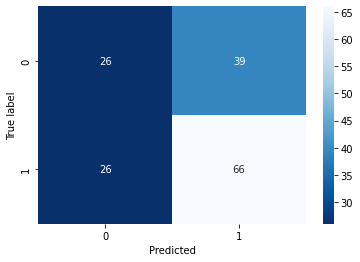

In [179]:
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

*Вывод:*

Количество FP (ошибок первого рода) критичнее, чем кол-во ошибок второго рода и должно быть сведено к минимуму, т.к в таком случае мы порекомендуем коров с неыкусным молоком

Метрика precision имеет значение 0.72, что неплохо, но нужно быть внимательнее

Метрика precision важнее метрики recall

Однако мы имеем 39 ошибки первого рода к 66 верноположительным предсказаниям, нужно минимизировать количество ошибок

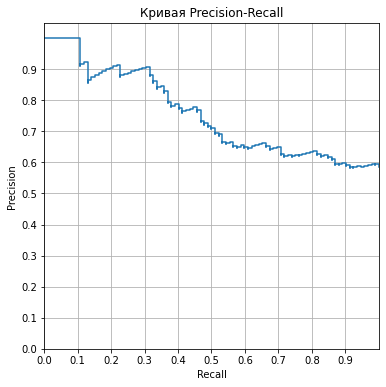

In [180]:
probabilities_valid = clf.predict_proba(X_valid)
precision, recall, thresholds = precision_recall_curve(y_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, 0.1))
plt.yticks(np.arange(0, 1, 0.1))
plt.grid()
plt.title('Кривая Precision-Recall')
plt.show()

In [181]:
y_proba = clf.predict_proba(X_valid)[:, 1]

proba_data = pd.DataFrame(zip(y_valid, y_proba), columns=['y_valid', 'y_proba']).sort_values(by='y_proba', ascending=False)

proba_data.head()

,y_valid,y_proba
138,1,0.881203
55,1,0.876400
7,1,0.866465
94,1,0.861784
132,1,0.855538


In [182]:
def threshold_choice(threshold_list, proba_df):
    result_df = pd.DataFrame(columns=['порог', 'precision', 'recall', 'количество_FP', 'число_предсказанных_объектов', 'всего_объектов_класса_1'])

    for threshold in threshold_list:
        column_name = 'y_pred_' + str(threshold)

        precision = proba_df.loc[proba_df[column_name] == 1, 'y_valid'].mean()

        predicted_objects = proba_df[column_name].sum()

        total_objects_class_1 = proba_df['y_valid'].sum()

        recall = proba_df.loc[(proba_df[column_name] == 1) & (proba_df['y_valid'] == 1)].shape[0] / total_objects_class_1

        # FP
        false_positives = proba_df.loc[(proba_df[column_name] == 1) & (proba_df['y_valid'] == 0)].shape[0]

        result_df = result_df.append({
            'порог': threshold,
            'precision': precision,
            'recall': recall,
            'количество_FP': false_positives,
            'число_предсказанных_объектов': predicted_objects,
            'всего_объектов_класса_1': total_objects_class_1,
        }, ignore_index=True)

    return result_df

In [183]:
proba_data_1 = proba_data.copy(deep=True)

thresholds_1 = [round(i, 2) for i in np.linspace(0.1, 1, num=15, endpoint=False)]
columns = []

for i in thresholds_1:
    columns.append('y_pred_' + str(i))
    proba_data_1['y_pred_' + str(i)] = proba_data_1['y_proba'].apply(lambda x: 1 if x > i else 0)

proba_data_1.head(5)

,y_valid,y_proba,y_pred_0.1,y_pred_0.16,y_pred_0.22,y_pred_0.28,y_pred_0.34,y_pred_0.4,y_pred_0.46,y_pred_0.52,y_pred_0.58,y_pred_0.64,y_pred_0.7,y_pred_0.76,y_pred_0.82,y_pred_0.88,y_pred_0.94
138,1,0.881203,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
55,1,0.876400,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
7,1,0.866465,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
94,1,0.861784,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
132,1,0.855538,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0


In [184]:
threshold_choice(thresholds_1, proba_data_1)

,порог,precision,recall,количество_FP,число_предсказанных_объектов,всего_объектов_класса_1
0,0.10,0.585987,1.000000,65.0,157.0,92.0
1,0.16,0.585987,1.000000,65.0,157.0,92.0
2,0.22,0.585987,1.000000,65.0,157.0,92.0
3,0.28,0.593548,1.000000,63.0,155.0,92.0
4,0.34,0.585034,0.934783,61.0,147.0,92.0
5,0.40,0.612403,0.858696,50.0,129.0,92.0
6,0.46,0.622807,0.771739,43.0,114.0,92.0
7,0.52,0.650000,0.706522,35.0,100.0,92.0
8,0.58,0.654762,0.597826,29.0,84.0,92.0
9,0.64,0.714286,0.489130,18.0,63.0,92.0


*Оптимальный порог:* 0.7

Мы минимизировали количество FP до 10, предсказали около половины всех объектов, которые на самом деле являются положительными (классом 1)

In [185]:
optimal = 0.70

# Применение порога к предсказанным вероятностям
y_pred_threshold = (y_proba > optimal).astype(int)

clf_accuracy_new = accuracy_score(y_valid, y_pred_threshold)
clf_recall_new = recall_score(y_valid, y_pred_threshold)
clf_precision_new = precision_score(y_valid, y_pred_threshold)

print(f'Old Accuracy: {clf_accuracy}')
print(f'Old Recall: {clf_recall}')
print(f'Old Precision: {clf_precision}')
print()
print(f'New Accuracy: {clf_accuracy_new}')
print(f'New Recall: {clf_recall_new}')
print(f'New Precision: {clf_precision_new}')

Old Accuracy: 0.5859872611464968
Old Recall: 0.6285714285714286
Old Precision: 0.717391304347826

New Accuracy: 0.5732484076433121
New Recall: 0.3804347826086957
New Precision: 0.7777777777777778


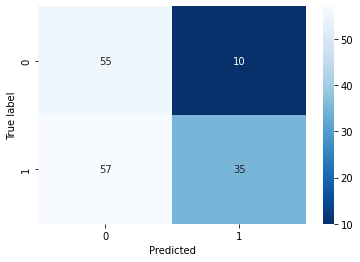

In [186]:
cm_new = confusion_matrix(y_valid, y_pred_threshold)
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

*Анализ:*

Количество ошибок 1-го рода сильно уменьшилось с (42 до 10)

Accuracy: уменьшилась на ~ 0.01

Recall: сильно уменьшилась до 0.38

Precision: увеличилась до 0.78 (было 0.72)



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:


    
- найдено верное решение для минимизации риска плохого прогноза 

- 👍 использование precision_recall_curve  и график
 
<div class="alert alert-warning">



Совет 🤔:


 

 

- по условию задачи интереснее было бы посмотреть график presicion для разных значений threshold

 

In [187]:
cow_2 = df_cow.copy(deep=True)

In [188]:
cow_2['эке'] = new_values['эке']
cow_2['эке_в_квадрате'] = cow_2['эке'] ** 2
cow_2['сырой_протеин'] = new_values['сырой_протеин']
cow_2['спо'] = new_values['спо']
cow_2['спо_кат'] = cow_2['спо'].apply(lambda x: 1 if x > 0.91 else 0)

cow_2.rename(columns={'текущая_жирность': 'жирность', 'текущий_уровень_белок': 'белок'}, inplace=True)
cow_2 = cow_2.drop(['имя_папы', 'эке', 'спо'], axis=1)

In [189]:
cow_2['тип_пастбища'] = cow_2['тип_пастбища'].str.capitalize()
cow_2.head()

,порода,тип_пастбища,порода_папы_быка,жирность,белок,возраст,ожидаемый_удой,эке_в_квадрате,сырой_протеин,спо_кат
0,Вис Бик Айдиал,Холмистое,Айдиал,3.58,3.076,более_2_лет,6081,233.361138,2019.947532,1
1,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.081,менее_2_лет,6248,233.361138,2019.947532,1
2,РефлешнСоверинг,Равнинное,Соверин,3.59,3.074,более_2_лет,6173,233.361138,2019.947532,1
3,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.061,более_2_лет,6173,233.361138,2019.947532,1
4,РефлешнСоверинг,Равнинное,Айдиал,3.64,3.074,более_2_лет,6601,233.361138,2019.947532,1


In [190]:
X_train_full.head()

,сырой_протеин,порода,тип_пастбища,порода_папы_быка,жирность,белок,возраст,спо_кат,эке_в_квадрате
0,1700,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,менее_2_лет,0,166.41
1,1750,РефлешнСоверинг,Холмистое,Соверин,3.72,3.076,более_2_лет,1,219.04
2,1769,РефлешнСоверинг,Холмистое,Айдиал,3.48,3.072,менее_2_лет,0,163.84
3,1994,РефлешнСоверинг,Равнинное,Соверин,3.62,3.076,более_2_лет,0,193.21
4,2140,Вис Бик Айдиал,Холмистое,Соверин,3.72,3.076,более_2_лет,1,219.04


In [191]:
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_кат']
num_col_names = ['жирность', 'белок', 'эке_в_квадрате', 'сырой_протеин']

encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train_full[cat_col_names])
X_test_ohe = encoder.transform(cow_2[cat_col_names])
encoder_col_names = encoder.get_feature_names_out(cat_col_names)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full[num_col_names])
X_test_scaled = scaler.transform(cow_2[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train_full = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_full = pd.concat([X_test_ohe, X_test_scaled], axis=1)


In [192]:
clf.fit(X_train_full, y_train_full)
y_proba = clf.predict_proba(X_test_full)[:, 1]
predictions_final = (y_proba > optimal).astype(int)

In [193]:
df_cow['ожидаемый_вкус_молока'] = predictions_final
df_cow['ожидаемый_вкус_молока'] = df_cow['ожидаемый_вкус_молока'].apply(lambda x: 'вкусно' if x == 1 else 'не вкусно')
to_buy = df_cow.query('ожидаемый_вкус_молока == "вкусно"')
df_cow

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст,ожидаемый_удой,ожидаемый_вкус_молока
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6081,вкусно
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6248,не вкусно
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6173,не вкусно
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6173,не вкусно
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6601,не вкусно
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,6564,не вкусно
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6248,не вкусно
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6173,вкусно
10,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,6122,не вкусно
11,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,6173,не вкусно


In [194]:
to_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст,ожидаемый_удой,ожидаемый_вкус_молока
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6081,вкусно
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6173,вкусно
16,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,6122,вкусно


*Вывод:*

Мы нашли трех номинантов для покупки, которые скорее всего удовлетворят условиям фермера: индексы - 0, 9 и 16

<div class="alert alert-info"> <b>Комментарии студентаV1:</b>Исправлено</div>

 
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Рекомендации получены

## Итоговые выводы

**Вывод:**

1. Были загружены 3 датафрейма и выведена общая информация о них. Данные соответствуют техническому заданию. Однако названия столбцов не соотвествуют "змеиному регистру" и должны быть переименованы. В типах данных ошибок нет. Размер датафрема df_ferma (634, 12), размер датафрема df_dad (629, 2), размер датафрема df_cow (16, 7)

2. Для df_ferma: Видно экстремальное значение в столбце "удой", после проверки физических свойств коровы, можно сделать вывод о то, что это выброс; Есть выбросы в столбце "жирность", однако их нельзя удалить, они составляют 14% от общего количества данных; Распредление столбца "белок" похоже на нормальное. Для df_cow: Не обнаружено выбросов

3. Корреляционный анализ: между целевым и входными признаками связь в основном линейная; удой и эке: сильная положительная линейная связь; удой и сырой_протеин: несильная положительная связь; удой и спо: возможна нелинейная связь, высокий коэф-т корреляции; удой и жирность: умеренная положительная связь; удой и белок: остсутствует связь; возраст имеет очень сильную взаимосвязь с целевым признаком

4. Были обучены 3 разные модели линейной регрессии, лучше всего себя показала **третья** модель с метриками:R^2: 0.8262863382397995, MSE: 35362.015389658605, RMSE: 188.04790716638834, MAE: 144.71452607169232
5. С помощью лучшей модели спрогнозировали удой коров, которых хочет купить фермер и добавили прогноз в столбец ожидаемый_удой. По прогнозам все коровы дадут более 6000кг удоя

6. Была обучена модель логистической регрессии с метриками: Accuracy - 0.5732484076433121; Recall - 0.3804347826086957
New Precision: 0.7777777777777778

7. Мы нашли двух номинантов для покупки, которые скорее всего удовлетворят условиям фермера: индексы - 9 и 16

 

<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>


 

    
Спасибо за работу Диана, но в настоящее время я не могу принять проект, поэтому пообщаемся ещё )



    
    

Я оставил небольшие советы и вопросики (если есть время и желание можешь воспользоваться/ответить)
    
В частности: 

 
- проект довольно большой, с постоянно повторяющимся кодом, так и запутаться недолго. Так что тут ты можно поразмыслить над архитектурой, и написать функции которые позволят сделать проект читабельней: это и в части графиков, и подсчета метрик, и процесса моделирования. Конкретные советы я оставил


Обязательное к исправлению:



    
- ошибка исполнения кода
    
    
    
- перестаралась с поиском аномалий, а вот скрытые дубликаты не нашла    
    
 
- не забываем что Пирсона используем только если количественный признак распределён нормально
 

     
    
    
    
Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 
    

<div class="alert alert-info"> <b>Комментарии студентаV1:</b>Постаралась учесть советы, но, к сожалению, сейчас мало времени, чтобы исправить все до идеала(. Благодарю за рекомендации, учту в следующих проектах!</div>


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Спасибо за работу!       Понял тебя, и с наступившим Новым Годом )

    
Красное исправлено, некоторые желтые советы использованы  (это все было по желанию), значит стремишься развиваться, а желание и интерес это главное. Надеюсь мои советы и вопросики были полезны и в копилочку знаний упало что то новое, а проект стал лучше, и симпатичней.


 
Отличная работа Диана. Желаю успехов в дальнейшей учебе!
 

<div class="alert alert-info"> <b>Комментарии студентаV2:</b>Спасбио, тебя тоже!</div>